# Neuronové sítě - učení s učitelem - klasifikace

In [4]:
import tensorflow as tf   # nezapomeňte v Anaconda přepnout prostředí na tensorflow!!!
#print(tf.__version__)  # tisk verze tensorflow

import numpy as np
import matplotlib.pyplot as plt   # možná bude potřeba doinstalovat v novém prostředí!!!


## Load dataset
---

seznam datasetů v TensorFlow https://www.tensorflow.org/datasets/catalog/overview#all_datasets


In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist = tf.keras.datasets.mnist



(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
train_images.shape  # rozměry trénovacích dat (počet, šířka obrázku, výška obrázku)
test_images.shape   # rozměry testovacích dat

train_images = train_images / 255.0   # normalizace dat - původní od 0 do 255
test_images = test_images / 255.0

# jména tříd
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    

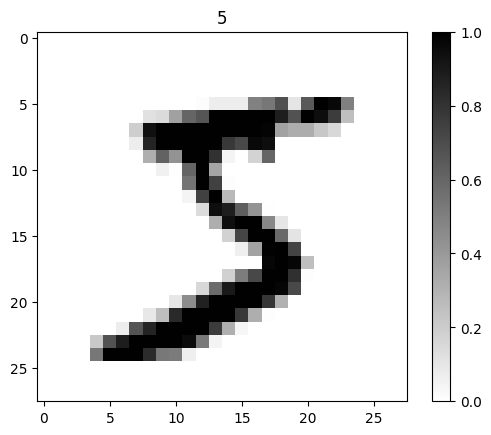

In [7]:
# shows sample s and its class c
def show_sample(s, c):

    plt.figure()
    plt.imshow(s, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(c)
    plt.show()
    
show_sample(train_images[0], class_names[train_labels[0]])    
    

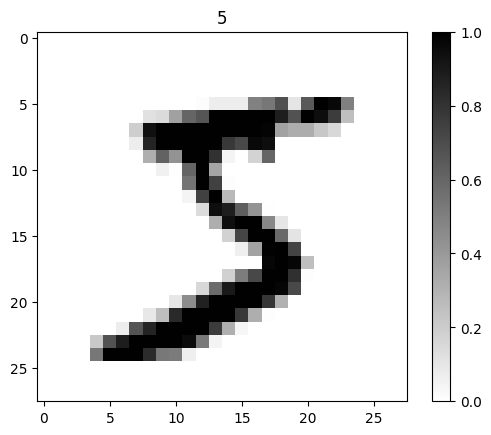

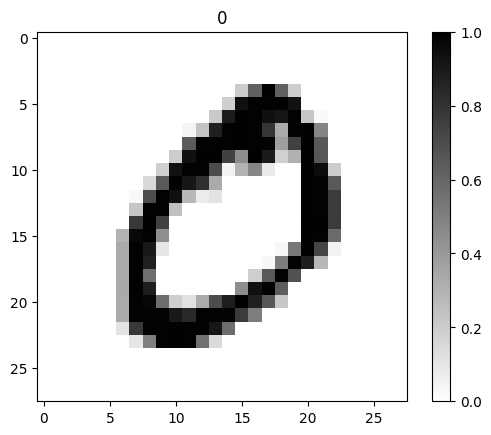

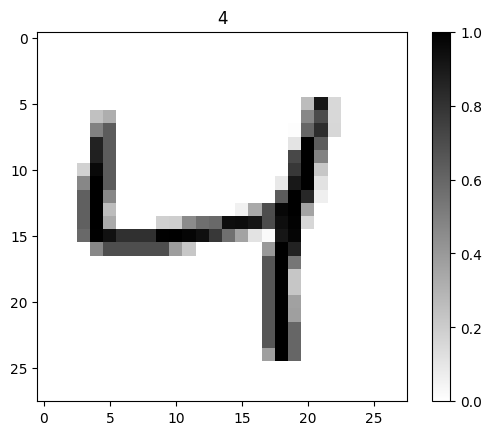

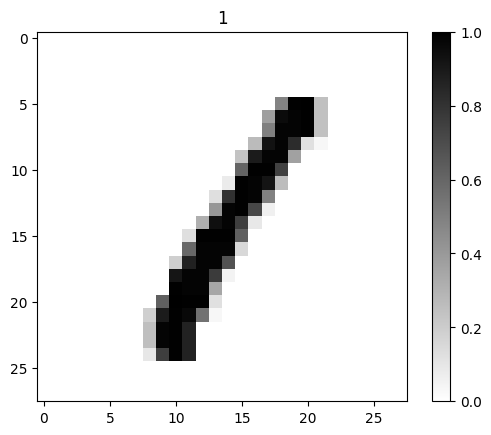

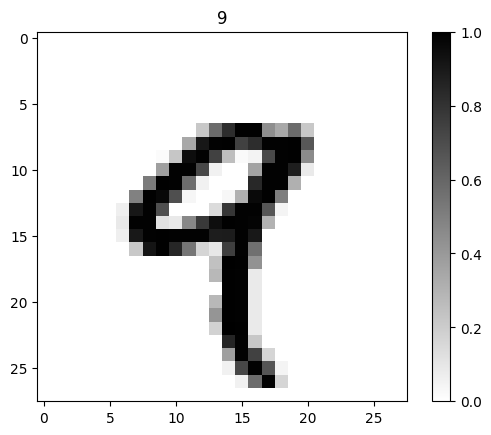

In [8]:
for i in range(5):
    show_sample(train_images[i], class_names[train_labels[i]])
    

## Neuronová síť - stavba
---
různé typy vrstev v tf.keras.layers - (https://www.tensorflow.org/api_docs/python/tf/keras/layers)

různé typy aktivačních funkcí - (https://www.tensorflow.org/api_docs/python/tf/keras/activations)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transformuje 2D obrazek do 1D vektoru
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

c:\Users\zalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# optimizer - způsob jakým se učíme z chyb na základě dat  
# loss - měření chyby vstup-výstup, snažíme se minimalizovat
# metrics - monitorování, jak nám jde trénování 


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Neuronové síť - učení
---

In [11]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8347 - loss: 0.6572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9407 - loss: 0.2083
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9583 - loss: 0.1465
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9696 - loss: 0.1104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0854
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0728
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9832 - loss: 0.0598
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0491
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9893 - loss: 0.0409
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0345


## Neuronová síť - evaluace
---

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 0s - 1ms/step - accuracy: 0.9773 - loss: 0.0719


## Neuronová síť - predikce
---

In [13]:
pr_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) # přidání softmax vrstvy

In [14]:
predictions = pr_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


In [15]:
# zobrazí predikci vzorku číslo i
def sample_predict(i, test_images, test_labels, predictions, class_names):
    s = test_images[i]
    c = class_names[test_labels[i]]
    show_sample(s, c)
    
    print("Probabilities")
    print("------------")
    for j in range(len(class_names)):
        print(class_names[j], ":", np.round(predictions[i, j], 2))
    
    ind = np.argmax(predictions[i])
    
    print("------------")
    print("true class:", c, ", predicted class:", class_names[ind])

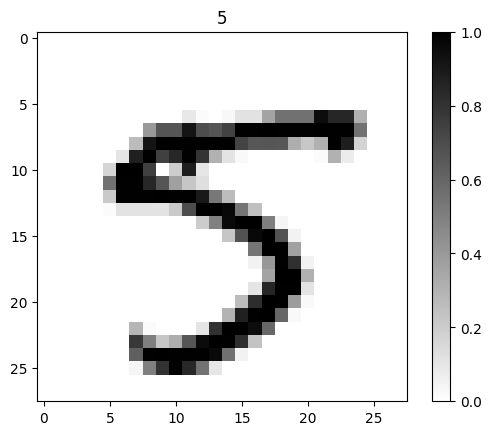

Probabilities
------------
0 : 0.0
1 : 0.0
2 : 0.0
3 : 0.0
4 : 0.0
5 : 1.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0
------------
true class: 5 , predicted class: 5


In [16]:
sample_predict(102, test_images, test_labels, predictions, class_names)

## Otázky
---

- Kolik položek jednoho typu bylo klasifikováno správně? 